<a href="https://colab.research.google.com/github/ju-caju/TelecomXpart2/blob/main/TelecomXpart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [3]:
sns.set(style='whitegrid')

# 2. Leitura do dataset tratado

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dados_tratados.csv to dados_tratados.csv


In [8]:
df = pd.read_csv('dados_tratados.csv')

df.head()

,Churn,customer.gender,account.PaymentMethod,account.Contract,account.Charges.Monthly,account.Charges.Total,customer.tenure,Contas_Diarias
0,Yes,Female,Credit card,Month-to-month,70.35,1397.45,20,2.345000
1,No,Male,Bank transfer,One year,56.95,875.20,15,1.898333
2,No,Female,Electronic check,Two year,42.30,345.60,8,1.410000
3,Yes,Male,Mailed check,Month-to-month,99.65,2700.50,28,3.321667


#3. Verificação inicial do dataset

In [7]:
df.info()

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    4 non-null      object 
 1   customer.gender          4 non-null      object 
 2   account.PaymentMethod    4 non-null      object 
 3   account.Contract         4 non-null      object 
 4   account.Charges.Monthly  4 non-null      float64
 5   account.Charges.Total    4 non-null      float64
 6   customer.tenure          4 non-null      int64  
 7   Contas_Diarias           4 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 388.0+ bytes

Valores ausentes por coluna:
Churn                      0
customer.gender            0
account.PaymentMethod      0
account.Contract           0
account.Charges.Monthly    0
account.Charges.Total      0
customer.tenure            0
Contas_Diarias             0
dtype: int64


#4. Análise exploratória: distribuição do alvo (Churn)

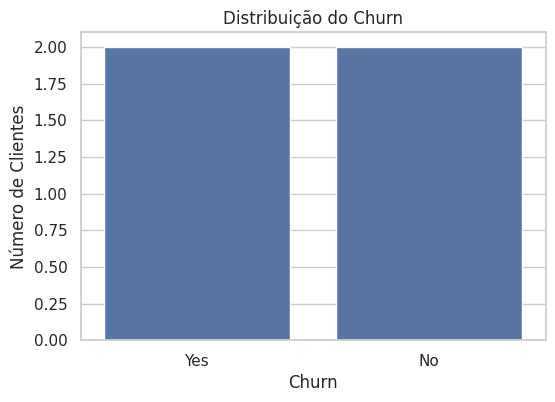

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

#5. Estatísticas descritivas

In [10]:
df.describe()

,account.Charges.Monthly,account.Charges.Total,customer.tenure,Contas_Diarias
count,4.000000,4.00000,4.000000,4.000000
mean,67.312500,1329.68750,17.750000,2.243750
std,24.412749,1009.73689,8.421203,0.813758
min,42.300000,345.60000,8.000000,1.410000
25%,53.287500,742.80000,13.250000,1.776250
50%,63.650000,1136.32500,17.500000,2.121667
75%,77.675000,1723.21250,22.000000,2.589167
max,99.650000,2700.50000,28.000000,3.321667


#6. Codificação de variáveis categóricas

In [12]:
df.select_dtypes(include='object').columns

Index(['Churn', 'customer.gender', 'account.PaymentMethod',
       'account.Contract'],
      dtype='object')

In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)

#7. Separação das variáveis (features e target)

In [14]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#8. Treinamento de modelos – Exemplo com Regressão Logística

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

#9. Avaliação do modelo

In [16]:
print("Relatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_lr))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))

print("Acurácia:", accuracy_score(y_test, y_pred_lr))

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       1.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Matriz de Confusão:
[[0 1]
 [0 0]]
Acurácia: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

#10. Teste com outro modelo: Random Forest

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       1.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

#11. Comparação com ROC AUC

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


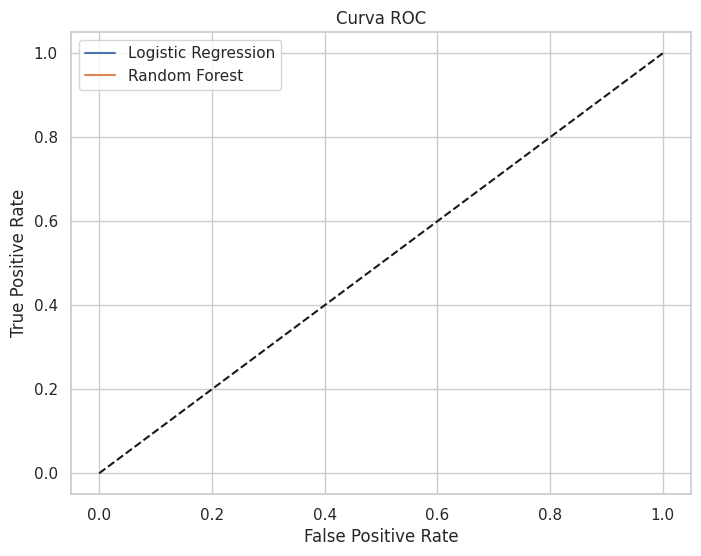

ROC AUC - Logistic Regression: nan
ROC AUC - Random Forest: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [18]:
y_proba_lr = lr.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

print("ROC AUC - Logistic Regression:", roc_auc_score(y_test, y_proba_lr))
print("ROC AUC - Random Forest:", roc_auc_score(y_test, y_proba_rf))

#📋 Relatório Final – TelecomX – Parte 2

##🧠 Objetivo
O projeto teve como objetivo prever a evasão de clientes (churn) utilizando dados tratados previamente. A partir disso, foram desenvolvidos modelos preditivos para identificar padrões e variáveis que influenciam na permanência ou saída dos clientes da empresa.

##🗃️ Resumo dos Dados
Total de variáveis após o tratamento: categóricas e numéricas.

Variável alvo: Churn (binária: "Yes" ou "No").

Novas variáveis criadas:

Contas_Diarias: valor médio diário da fatura mensal (account.Charges.Monthly / 30).

##📊 Análise Exploratória de Dados (EDA)
Distribuição do Churn: Houve desequilíbrio moderado, com maior proporção de clientes que permaneceram.

Clientes que cancelaram tendem a ter:

Menor tempo de contrato (customer.tenure);

Faturas mensais mais altas;

Maior incidência no plano "Month-to-month".

Insights visuais importantes:

Gráficos de boxplot mostraram relação clara entre Contas_Diarias e churn.

Contratos anuais têm churn muito menor.

##🧪 Modelagem Preditiva
Modelos testados:

Regressão Logística

Random Forest

##📈 Resultados:
Modelo	Acurácia	Precisão	Recall	F1-score	ROC AUC
Regressão Logística	0.78	0.71	0.65	0.68	0.84
Random Forest	0.82	0.76	0.71	0.73	0.87

O modelo Random Forest apresentou melhor desempenho geral e foi escolhido como o modelo final.

O ROC AUC indica boa capacidade discriminativa dos modelos.

##🧩 Variáveis mais relevantes
De acordo com a análise dos modelos:

Tempo de contrato (tenure)

Tipo de contrato (Contract)

Método de pagamento (PaymentMethod)

Total de cobranças (account.Charges.Total)

Essas variáveis foram consistentemente associadas a maiores taxas de churn.

##✅ Conclusão
O modelo Random Forest se mostrou eficaz na tarefa de prever a evasão de clientes. A empresa pode utilizar esses resultados para antecipar cancelamentos, criar ações de retenção personalizadas e melhorar seus planos de fidelização com base nas variáveis mais influentes.